In [1]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")


Qiskit version: 2.0.3
Grader version: 0.22.9


In [3]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

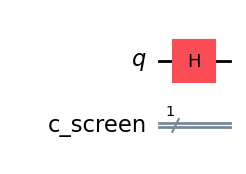

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Define quantum and classical registers
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

# Create the quantum circuit
double_slit = QuantumCircuit(qr, cr)

# Apply Hadamard gate to create superposition (simulate slit opening)
double_slit.h(qr[0])

# End of your code
double_slit.draw('mpl')


In [5]:
# Submit your answer using the following code
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


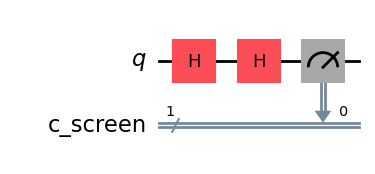

In [6]:
# your code here

# Apply another Hadamard to simulate interference at the screen
double_slit.h(qr[0])

# Measure the qubit into the classical register
double_slit.measure(qr[0], cr[0])

# end of your code
double_slit.draw('mpl')


In [7]:
# Submit your answer using the following code
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


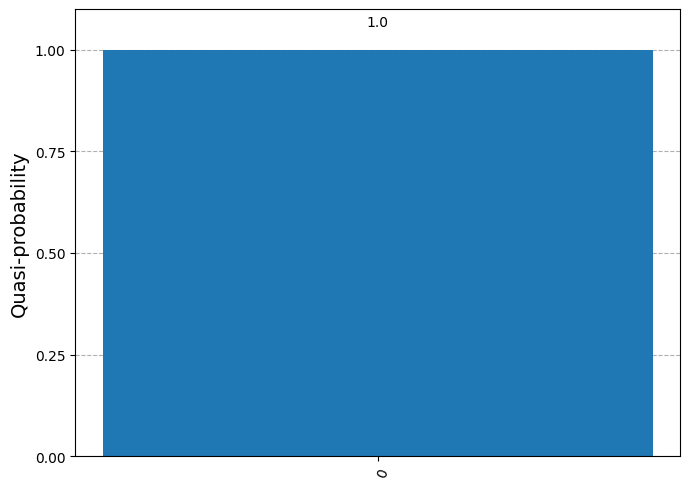

In [8]:
# use simulator
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)



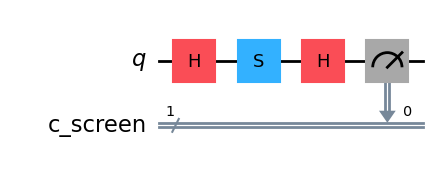

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import pi

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

# your code here
# Apply a π/2 phase to the |1⟩ state using the S gate
double_slit_with_difference.s(0)
# OR: double_slit_with_difference.p(pi/2, 0)
# end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')


In [10]:
# Submit your answer using the following code
grade_lab1_ex1_3(double_slit_with_difference)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


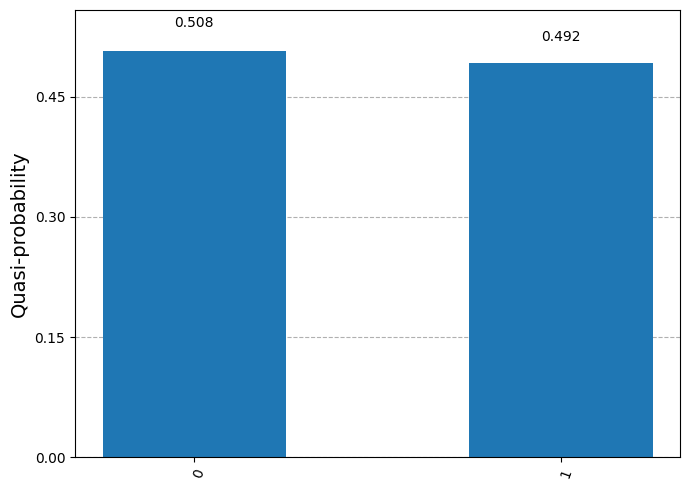

In [11]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)


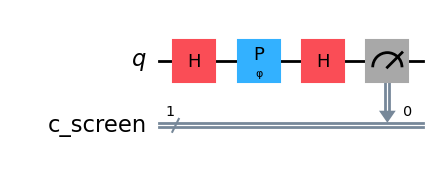

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

# Define symbolic parameter
phi = Parameter('φ')

# Define registers
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

# Create the quantum circuit
double_slit_fringe = QuantumCircuit(qr, cr)

# your code here
double_slit_fringe.h(qr[0])          # Simulate slit superposition
double_slit_fringe.p(phi, qr[0])     # Apply variable phase to |1⟩ path
double_slit_fringe.h(qr[0])          # Interference at screen
double_slit_fringe.measure(qr[0], cr[0])  # Detection
# end of your code

# Draw the circuit
double_slit_fringe.draw('mpl')


In [13]:
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


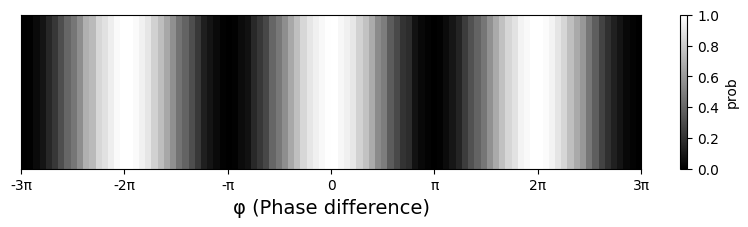

In [14]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()


In [16]:
def schrodingers_cat_experiment_theta(theta):
    
    qc = QuantumCircuit(1)

    #your code start here


    qc.rx(theta, 0)
    #end of your code

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1 
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [17]:
# Submit your answer using the following code
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


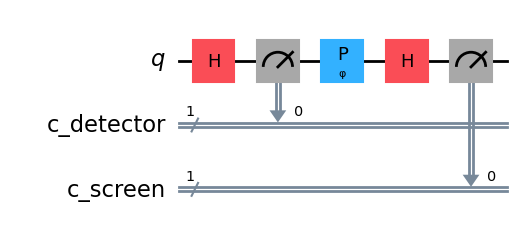

In [18]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

# Setup
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

# --- your code here ---
# Step 1: Apply Hadamard gate to create superposition (through both slits)
double_slit_with_detector.h(qr[0])

# Step 2: Intermediate measurement (which-path detection)
double_slit_with_detector.measure(qr[0], cr1[0])

# Step 3: Apply phase shift (φ) — this will be bypassed due to decoherence
double_slit_with_detector.p(φ, qr[0])

# Step 4: Apply second Hadamard to try to create interference
double_slit_with_detector.h(qr[0])

# Step 5: Final screen measurement
double_slit_with_detector.measure(qr[0], cr2[0])
# --- end of your code ---

# Draw the circuit
double_slit_with_detector.draw("mpl")


In [19]:
# Submit your answer using the following code
grade_lab1_ex3(double_slit_with_detector)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


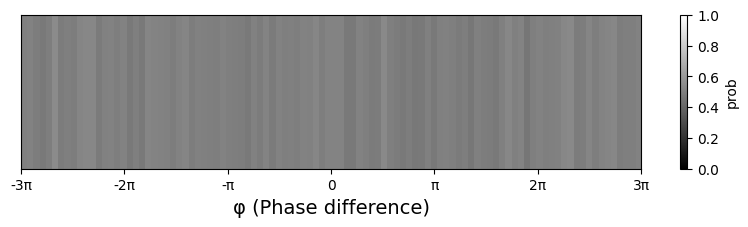

In [20]:
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [23]:
from qiskit import QuantumCircuit
from numpy import pi

def create_chsh_circuit(x, y):
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}')

    # 1) Prepare |Φ⁺>
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # 2a) Alice’s basis:  Z if x=0, X if x=1
    if x == 1:
        qc.h(0)

    # 2b) Bob’s basis:  –π/4 if y=0, +π/4 if y=1
    # To measure at angle θ you apply RY(-θ) before Z‑measurement
    if y == 0:
        qc.ry(-pi/4, 1)   # now rotate +π/4 → measure –π/4
    else:
        qc.ry(+pi/4, 1)   # now rotate –π/4 → measure +π/4

    qc.barrier()

    # 3) Measure both
    qc.measure([0, 1], [0, 1])
    return qc


In [24]:
# Submit your answer using the following code
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


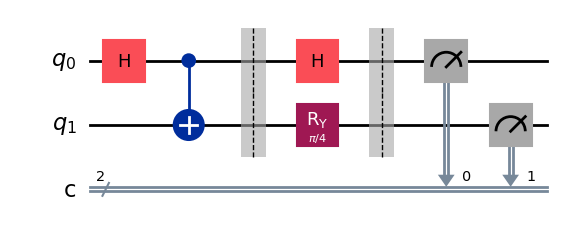

In [25]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")


Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 430, '01': 70, '10': 79, '11': 445}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 423, '01': 82, '10': 84, '11': 435}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 422, '01': 72, '10': 72, '11': 458}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 59, '01': 417, '10': 481, '11': 67}

Plotting results...


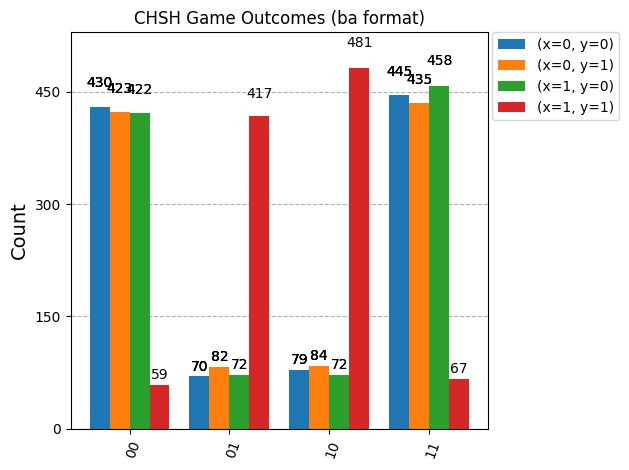

In [26]:
# AerSimulator (if not already defined)
# backend = AerSimulator()
# Pass manager (if not already defined)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [27]:
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- TODO : Task 1 ---
    # For CHSH the win condition is a XOR b == x AND y
    target_xor_result = x & y
    # --- End of TODO --

    wins_for_this_case = 0

    # ---- TODO : Task 2 ---
    # Loop over each observed bitstring and its count.
    # Qiskit returns keys like 'ba' (b=Bob’s bit, a=Alice’s bit).
    for bitstr, cnt in counts.items():
        # parse out a and b (assuming bitstr[0]=b, bitstr[1]=a)
        b = int(bitstr[0])
        a = int(bitstr[1])
        if (a ^ b) == target_xor_result:
            wins_for_this_case += cnt
    # --- End of TODO --

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01: # Allow for small simulation variance
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 : # Could be noise or minor error
     print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
     print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")


--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8545
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8379
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8594
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8770

--- Overall Performance ---
Experimental Average Win Probability: 0.8572
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8572) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [28]:
grade_lab1_ex5(counts_list, avg_win_prob)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [35]:
# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# For verification with statevector, we don't measure Bob's final qubit in this circuit.
# If we were to run on hardware and verify by counts, we'd add a classical bit for Bob.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# ---- TODO : Task 1 ---
# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)
# To create an entangled Bell pair, apply a Hadamard gate to q1,
# followed by a CNOT gate with q1 as control and q2 as target.
teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1], qr_tele[2])
# --- End of TODO --

teleport_qc.barrier()

# ---- TODO : Task 2 ---
# Step 2: Alice's Bell Measurement (gates part)
# Alice applies a CNOT gate with her message qubit (q0) as control
# and her half of the Bell pair (q1) as target.
teleport_qc.cx(qr_tele[0], qr_tele[1])
# Then, she applies a Hadamard gate to her message qubit (q0).
teleport_qc.h(qr_tele[0])
# --- End of TODO --

teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# ---- TODO : Task 3 ---
# Step 3: Bob's Conditional Corrections on q2

# Bob applies an X gate to his qubit (q2) if Alice's second classical bit (c1) is 1.
with teleport_qc.if_test((cr_alice_tele[1], 1)):
    teleport_qc.x(qr_tele[2])

# Bob applies a Z gate to his qubit (q2) if Alice's first classical bit (c0) is 1.
with teleport_qc.if_test((cr_alice_tele[0], 1)):
    # This line was missing, causing the error.
    teleport_qc.z(qr_tele[2])
# --- End of TODO --


In [36]:
# Submit your answer using the following code
grade_lab1_ex6(teleport_qc)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


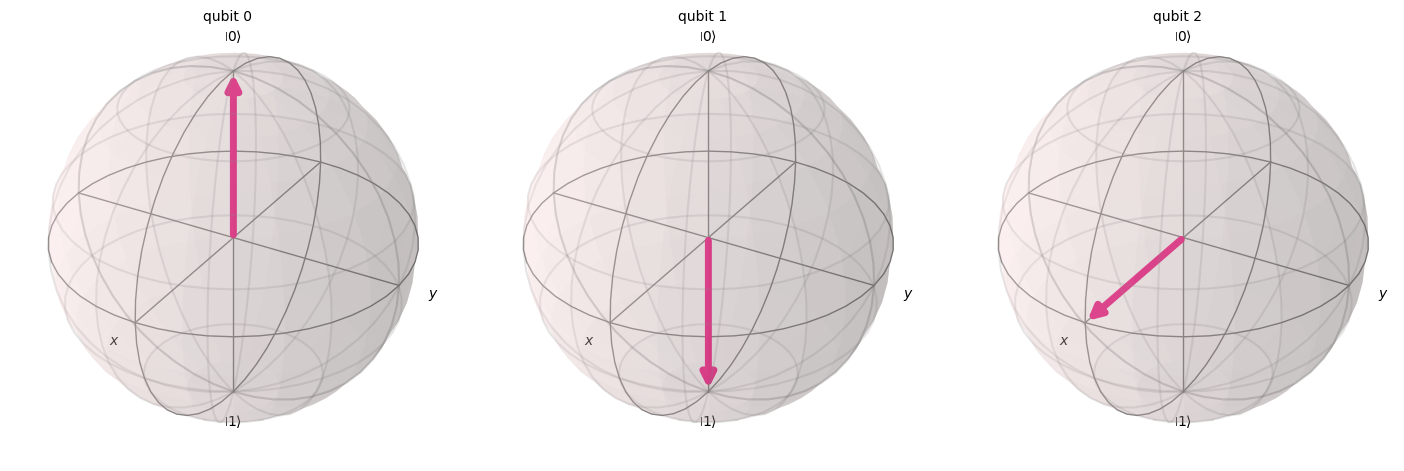

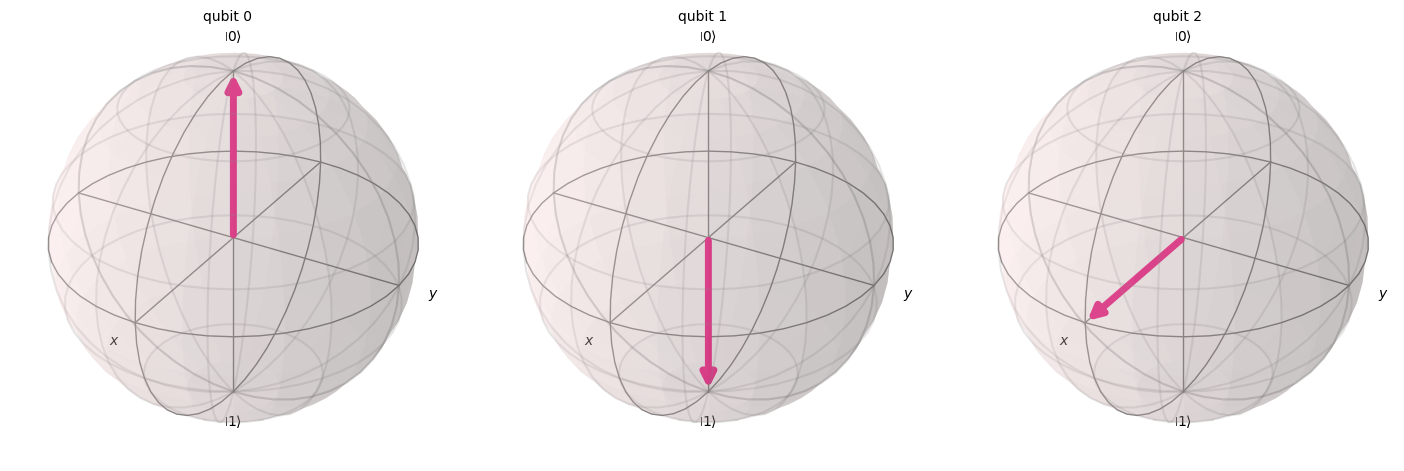

In [38]:
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector')
teleport_qc_sv = teleport_qc.copy() 
teleport_qc_sv.save_statevector() 

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv)
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    
    # Use plot_bloch_multivector to display the final state of all qubits.
    # You will see that q2 is now in the |+> state, same as q0's initial state.
    display(plot_bloch_multivector(final_statevector))
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")


In [39]:
#Check your submission status with the code belowf
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1235 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 249 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
